# Calculus for optimization

##### Keywords: calculus, optimization,  gradient descent

## Contents
{:.no_toc}
* 
{: toc}

In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation



You will need to install the following package to get things to work.

`pip install git+https://github.com/jakevdp/JSAnimation.git`

A lot of the animations here were adapted from: http://tillbergmann.com/blog/python-gradient-descent.html

In [2]:
from JSAnimation import IPython_display

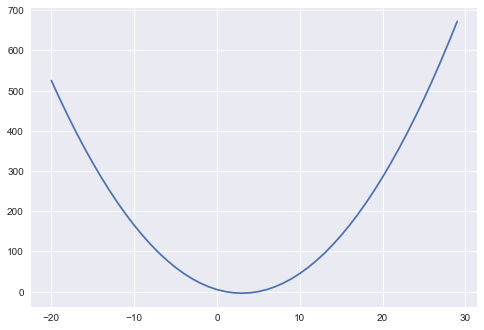

In [3]:
xlist=np.arange(-20,30,1)
f = lambda x: x**2-6*x+5
flist = [f(x) for x in xlist]
plt.plot(xlist, flist);

## The Basic Idea of gradient Descent

The gradient is the direction of steepest change. This direction does not matter in 1d, but the idea in 1d is the same: you move by the amount of your derivative times a step size. Too small a step, and you take for ever  to go down the hill. To much a step and you overshoot, oscillate around, and then finally make it.

Step size is important.

In [4]:
#adapted from http://tillbergmann.com/blog/python-gradient-descent.html

def grad_des1d(f, fprime, step=0.01, maxsteps=0, precision=0.001, start=25):
    mins = []
    costs = []
    old=0
    current = start
    mins.append(start)
    counter = 0
    while abs(current - old) > precision:
        old = current 
        gradient = fprime(old) 
        move = gradient * step
        current = old - move
        mins.append(current)
        if maxsteps:
            counter+=1
            if counter == maxsteps:
                break
 
    return mins

In [5]:
def animator(f, xvals, xdatafn, ydatafn, frameskip, ax, line):
    
    fvals=[f(x) for x in xvals]
    ax.plot(xvals, fvals, lw=3)
    line, = ax.plot([], [], "D", markersize=12)

    def init():
        line.set_data([], [])
        return line,

    def animate(i):
        x_n = xdatafn(i, frameskip)
        y_n = ydatafn(i)
        line.set_data(x_n, y_n)
        return line,
    return init, animate

In [6]:
fmins = grad_des1d(f, lambda x: 2*x - 6)


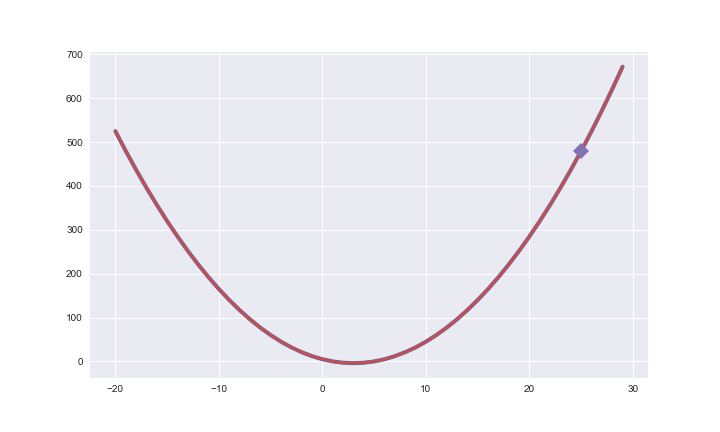
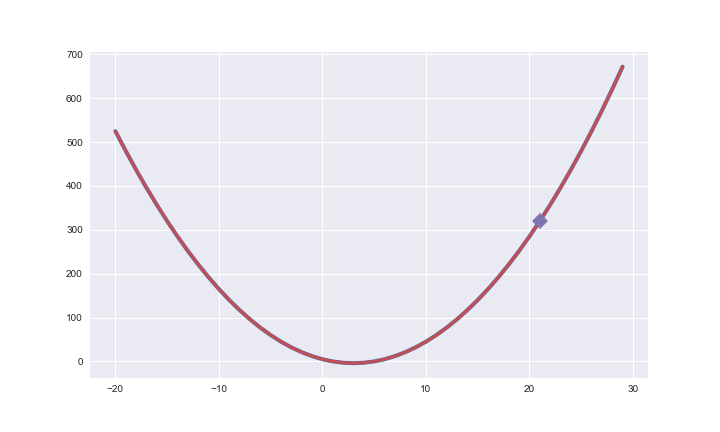
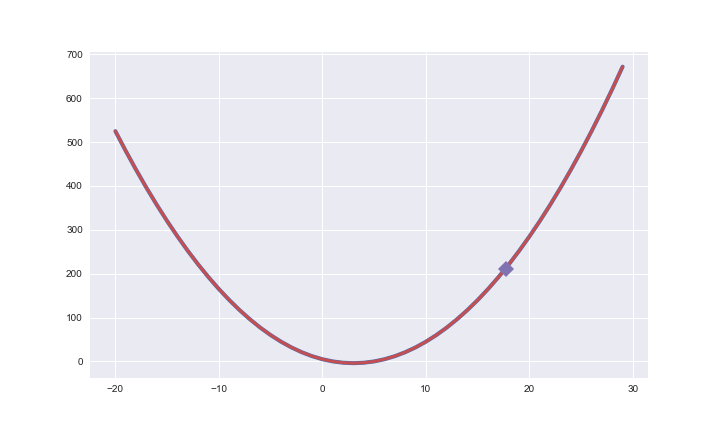
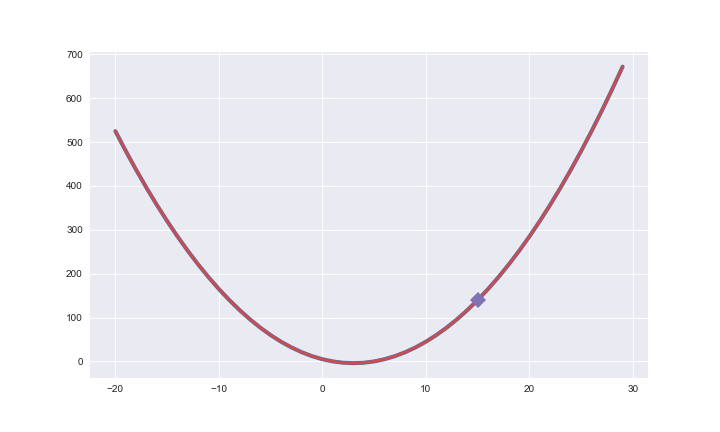
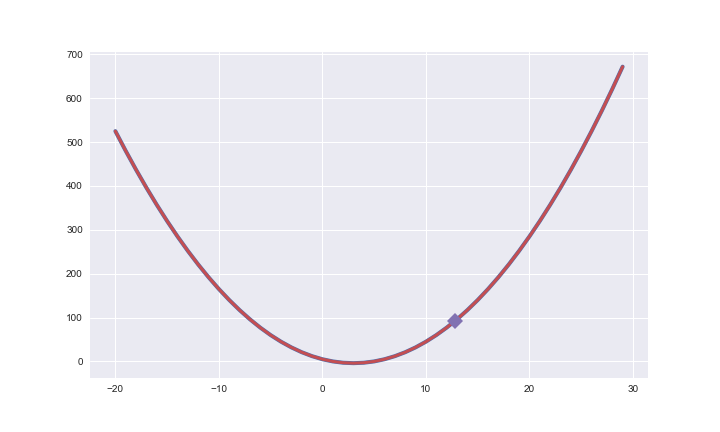
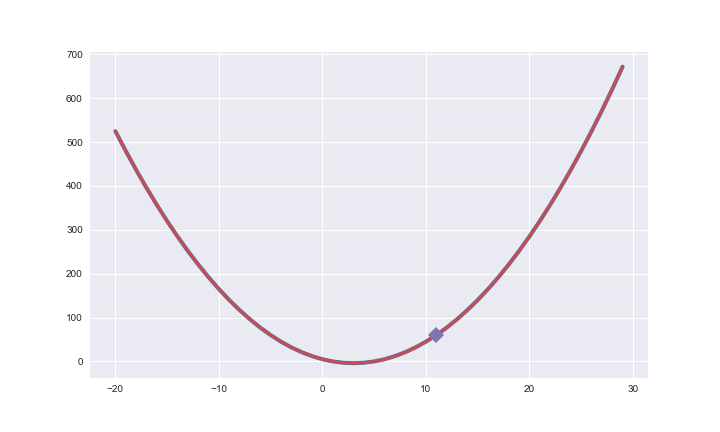
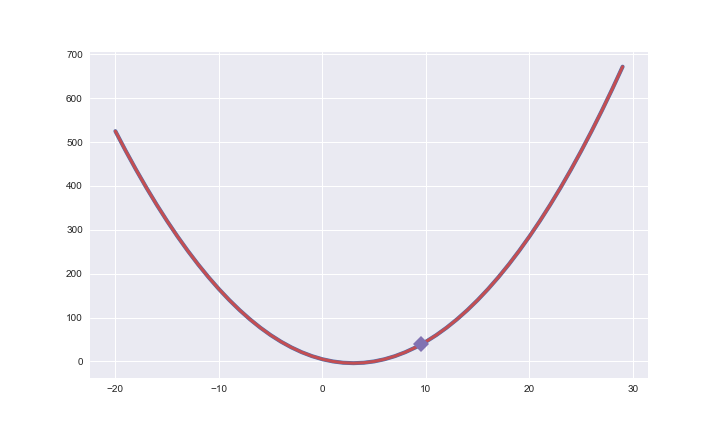
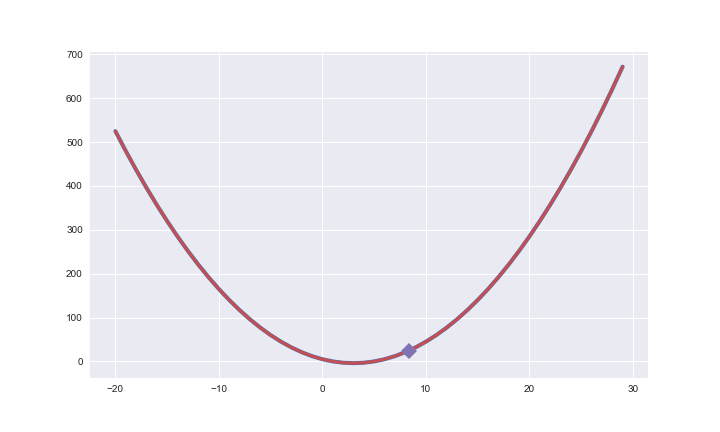
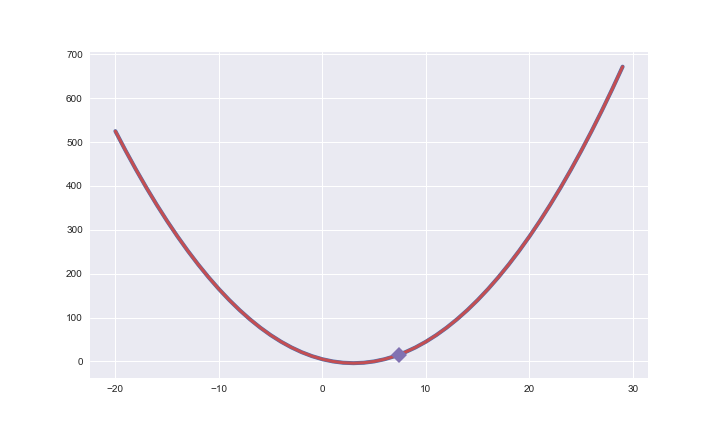
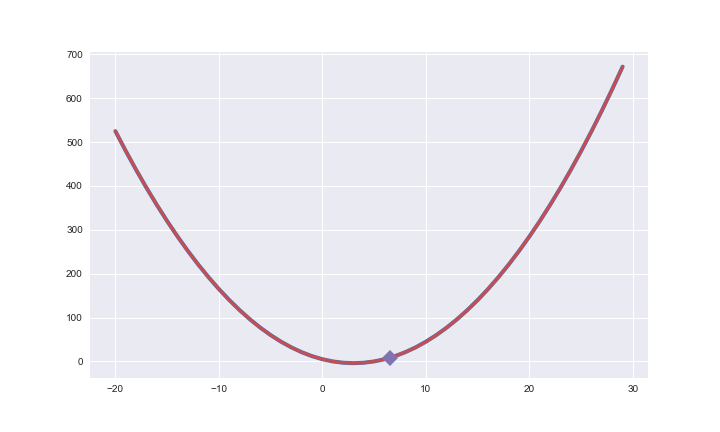
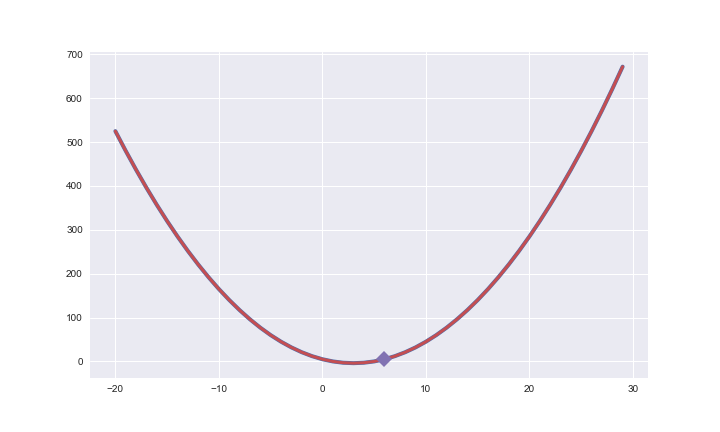
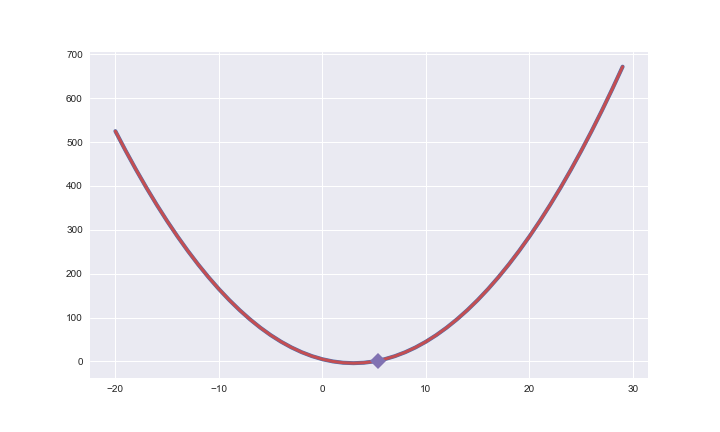
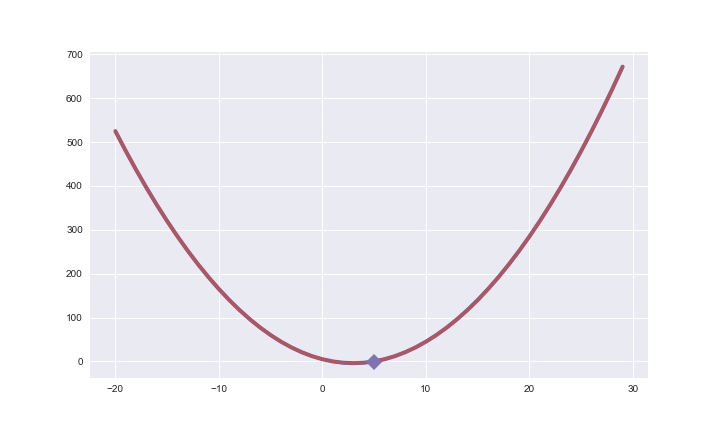
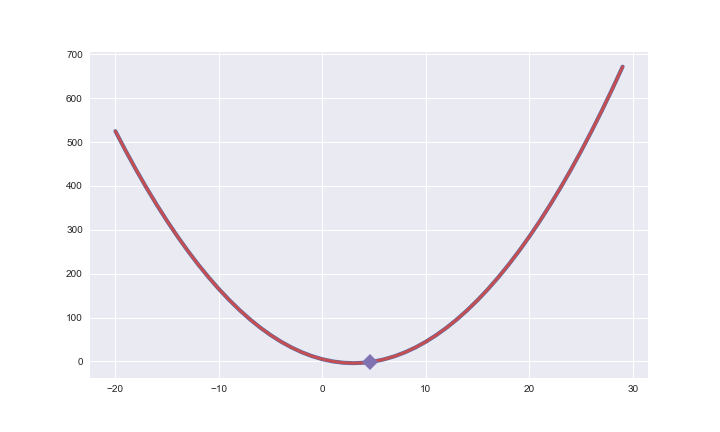
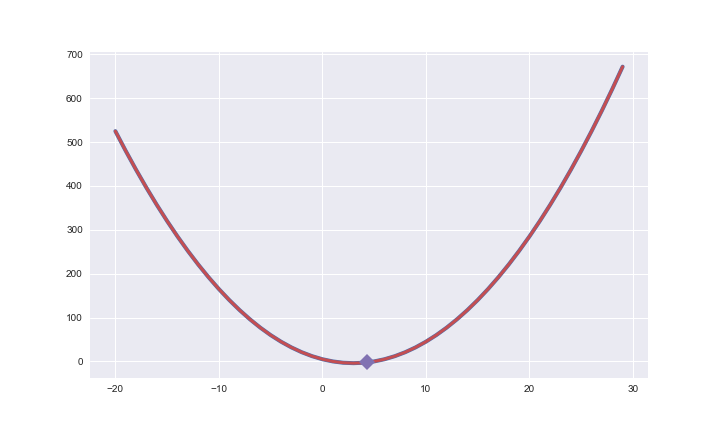
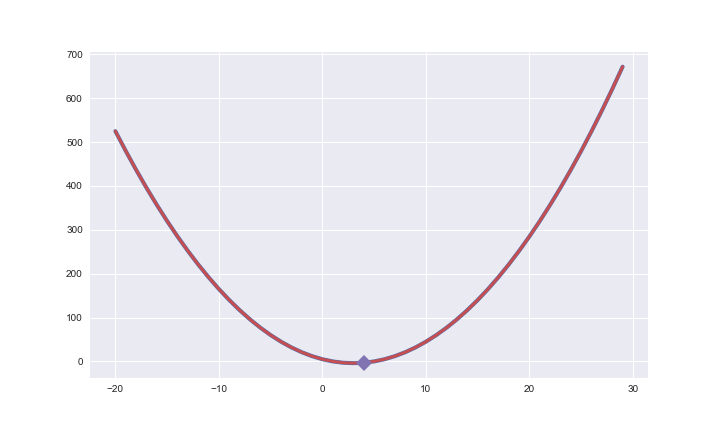
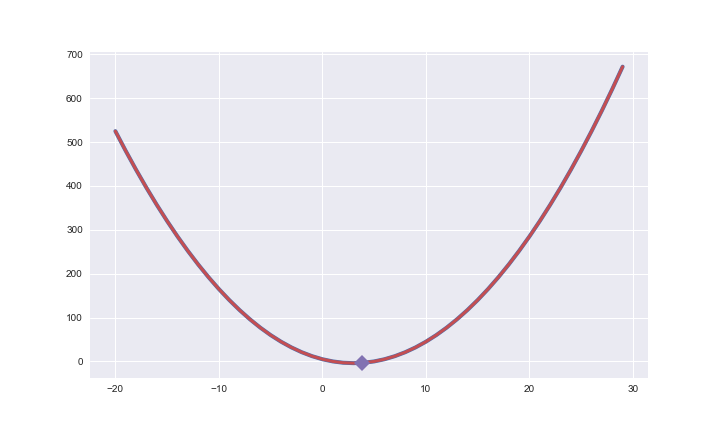
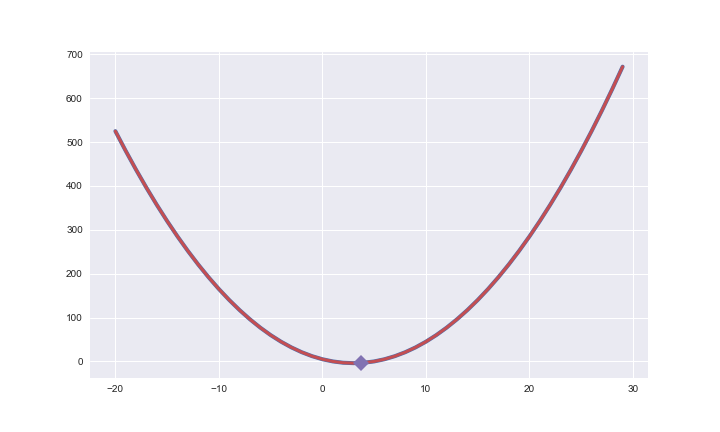
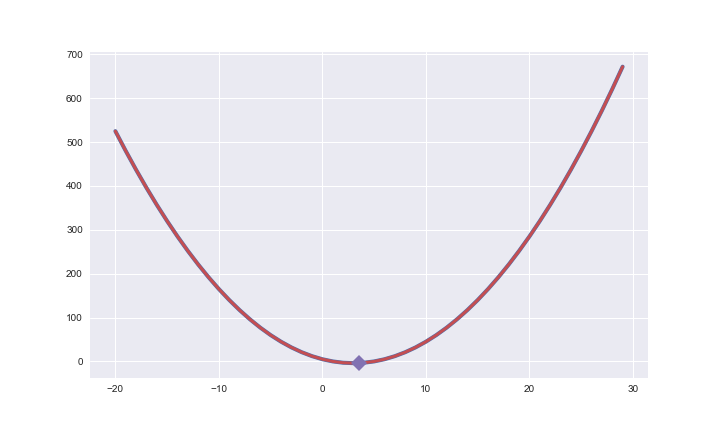
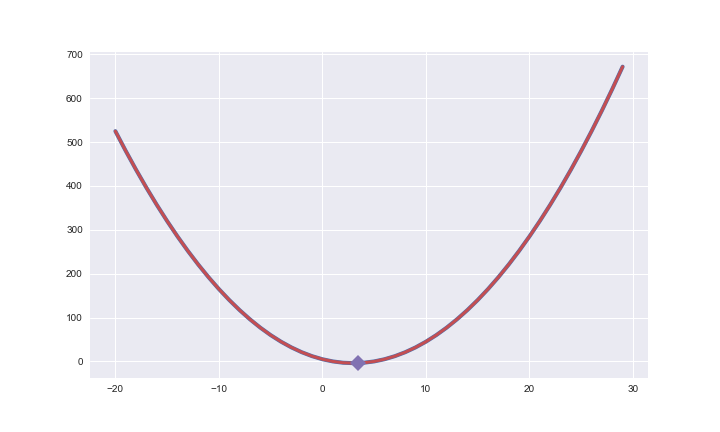
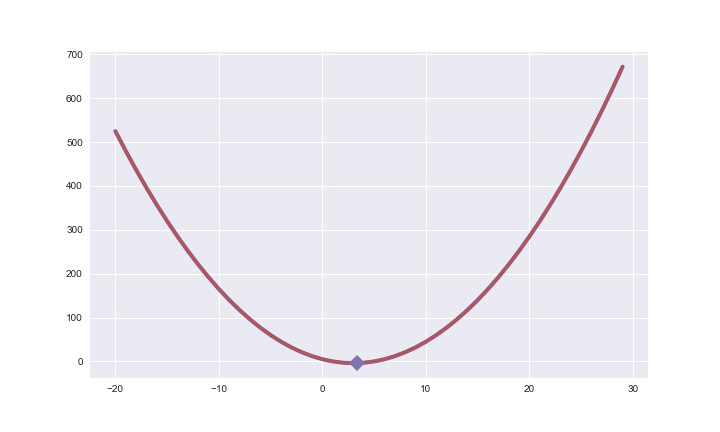
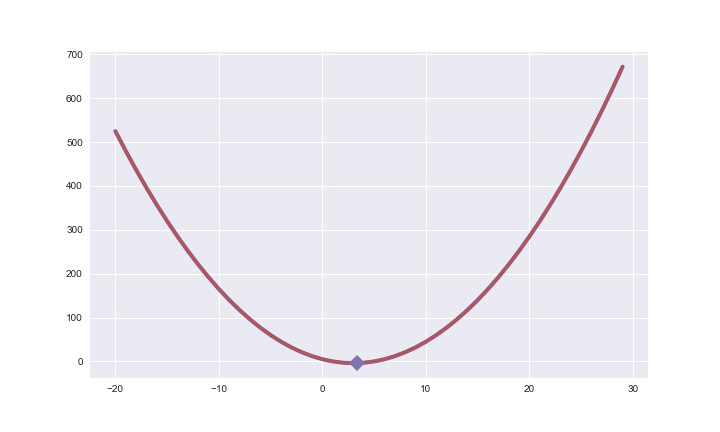
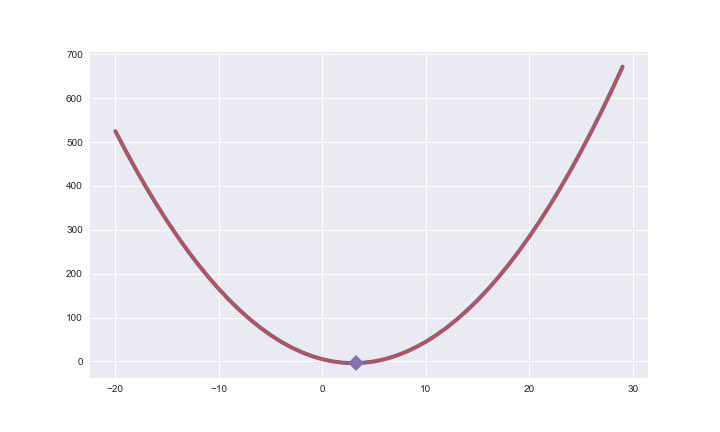
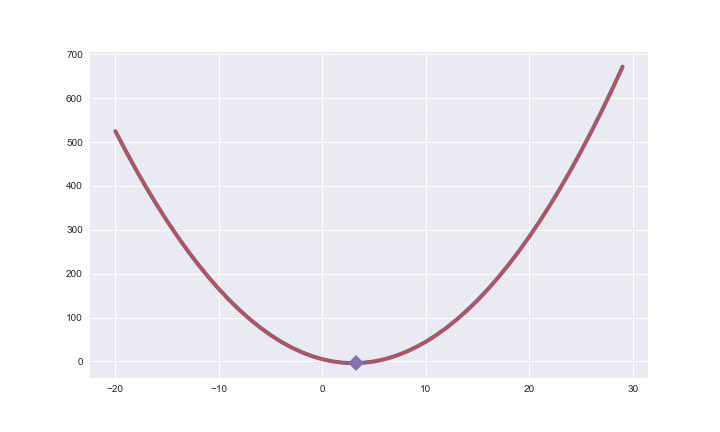
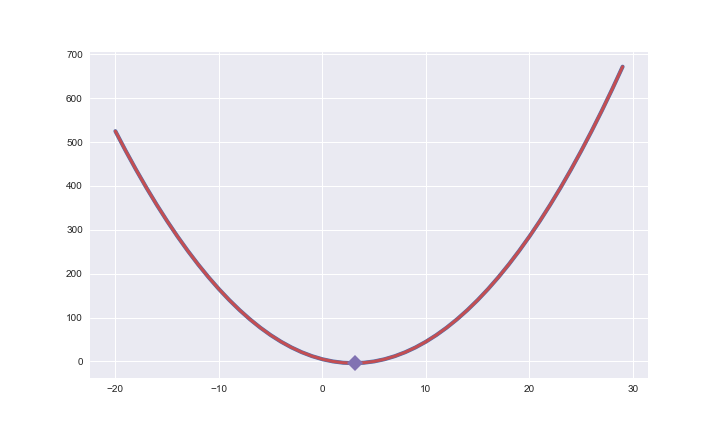
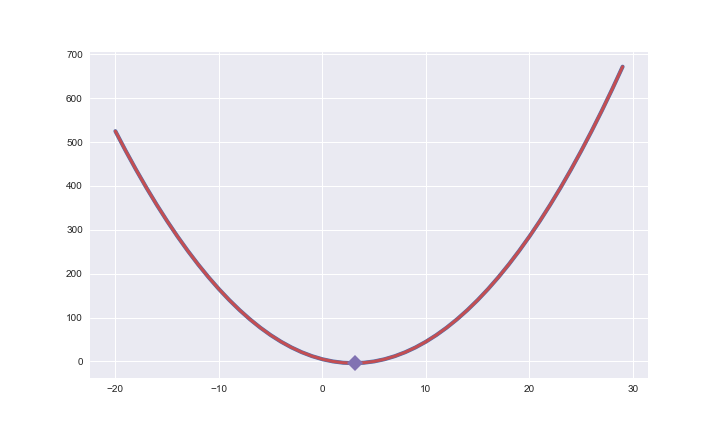
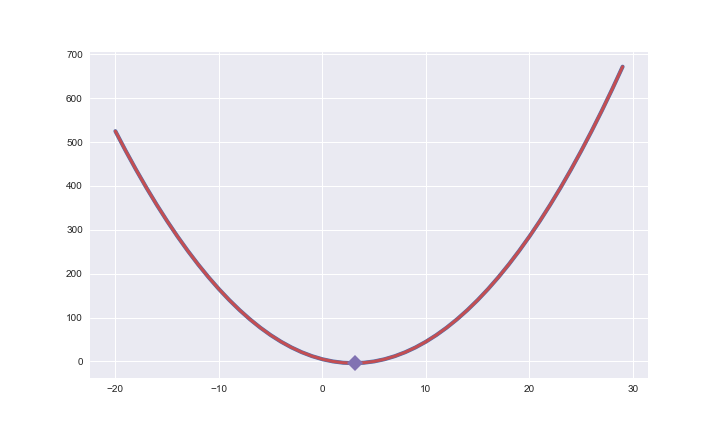
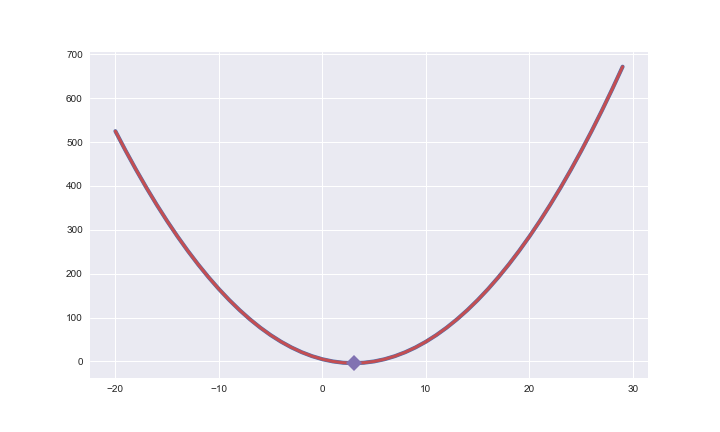
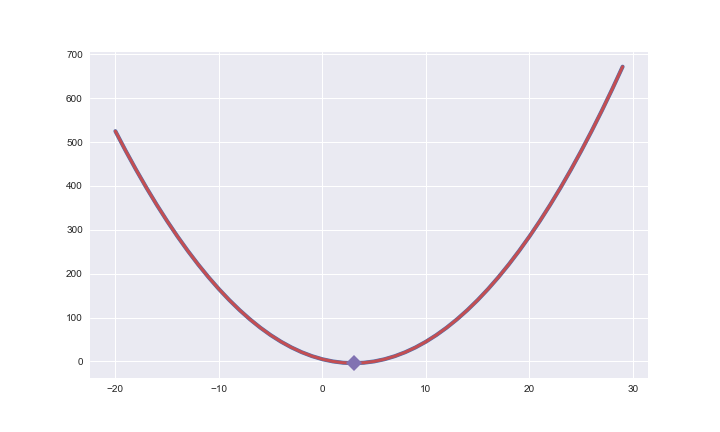
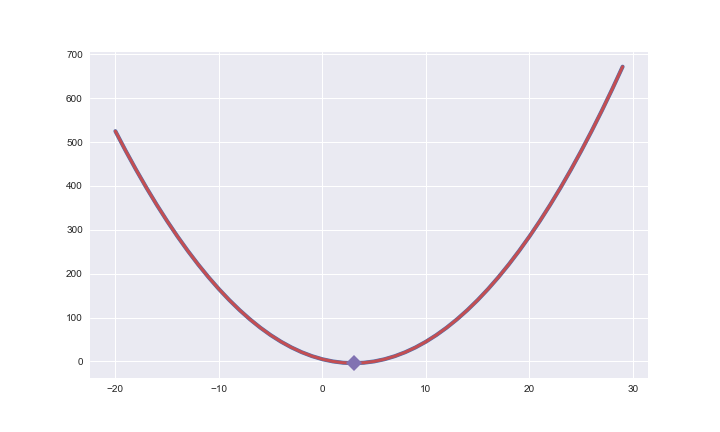
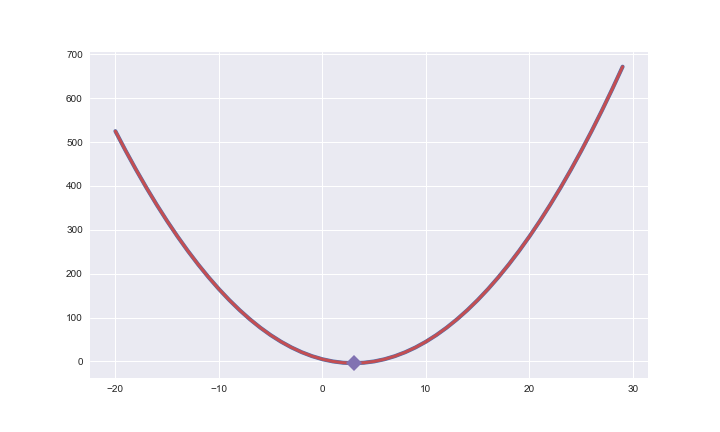

In [7]:
fig = plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.plot(xlist,flist, linewidth=4 )
line, = ax.plot([], [], "D", markersize=12)
fskip=10
xdatafn = lambda i, fskip: fmins[0::fskip][i]
ydatafn = lambda i: f(xdatafn(i, fskip))
i, a = animator(f, xlist, xdatafn, ydatafn, fskip, ax, line)
anim = animation.FuncAnimation(fig, a, init_func=i,
                        frames=len(fmins[0::fskip]), interval=200)
anim.save('images/1dgd.mp4')
anim

In [8]:
fmins2 = grad_des1d(f, lambda x: 2*x - 6, step=0.8, maxsteps=100)


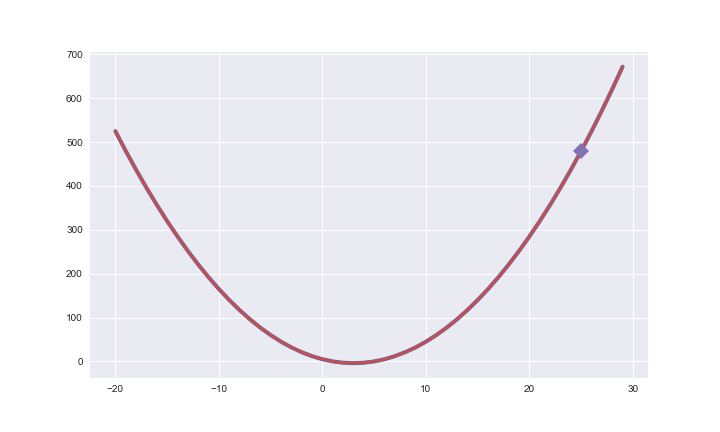
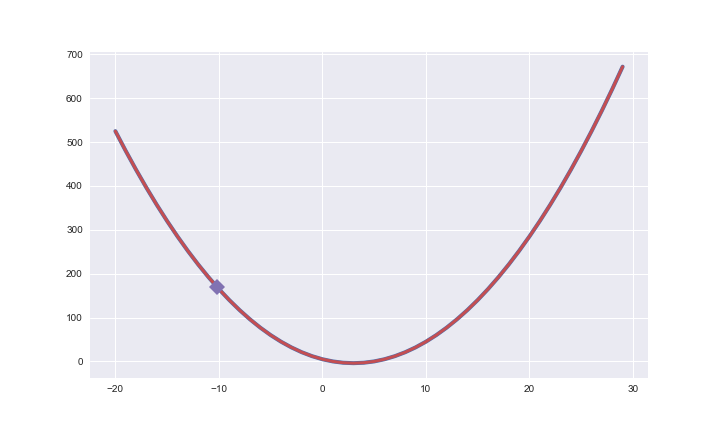
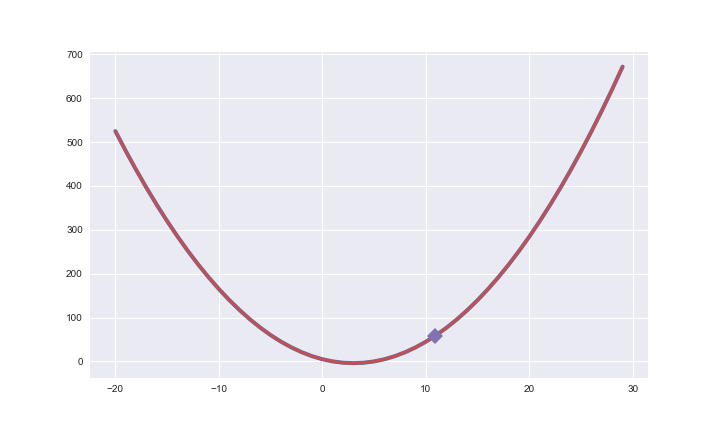
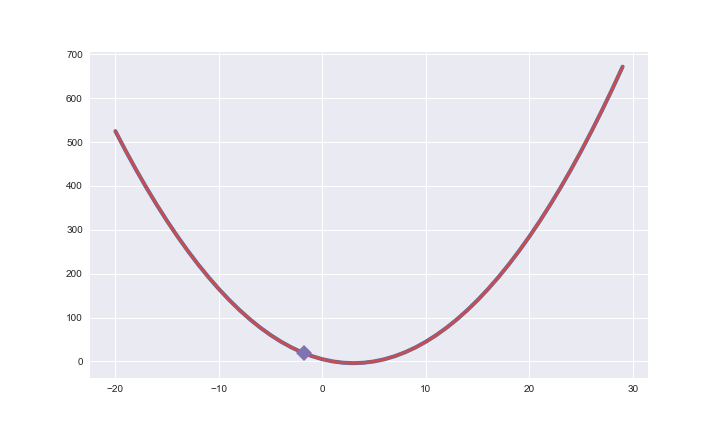
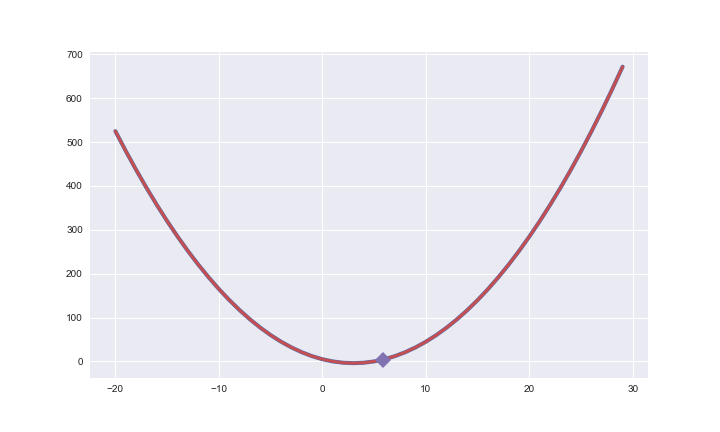
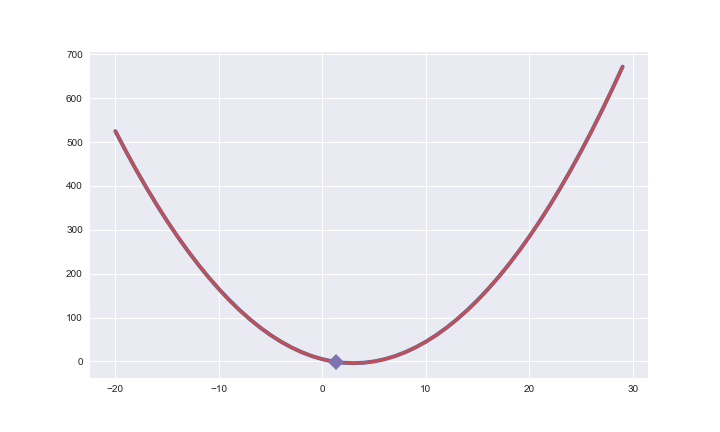
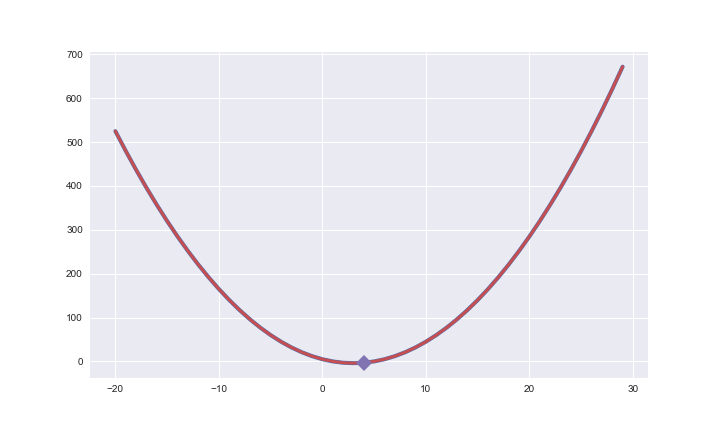
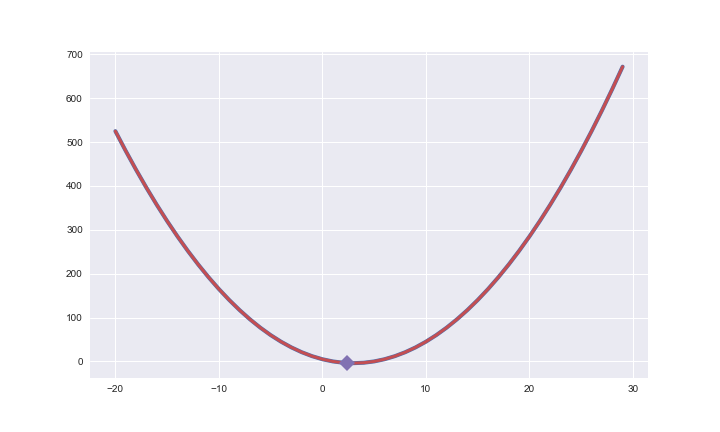
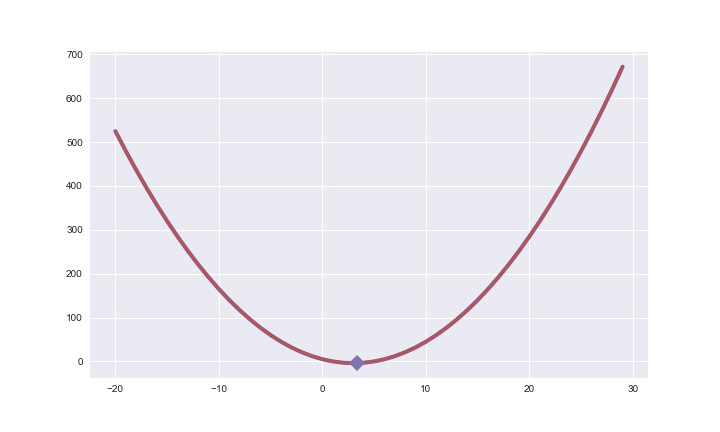
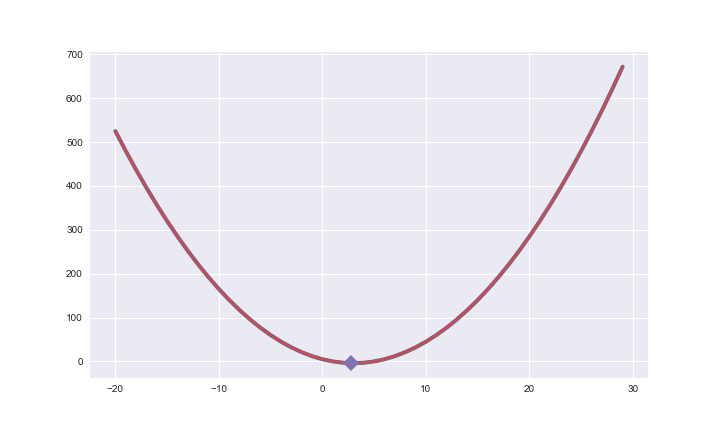
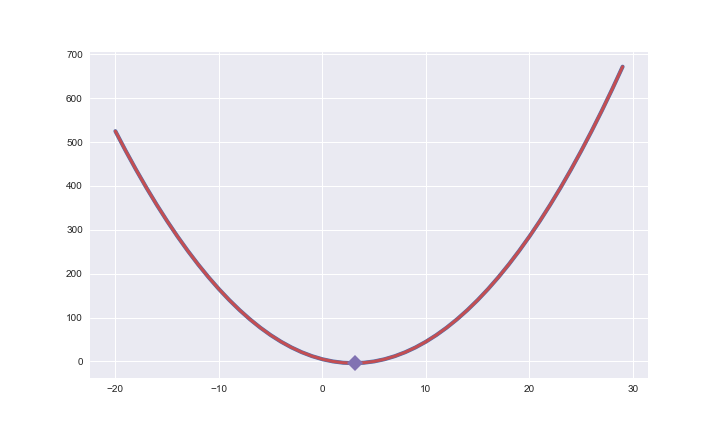
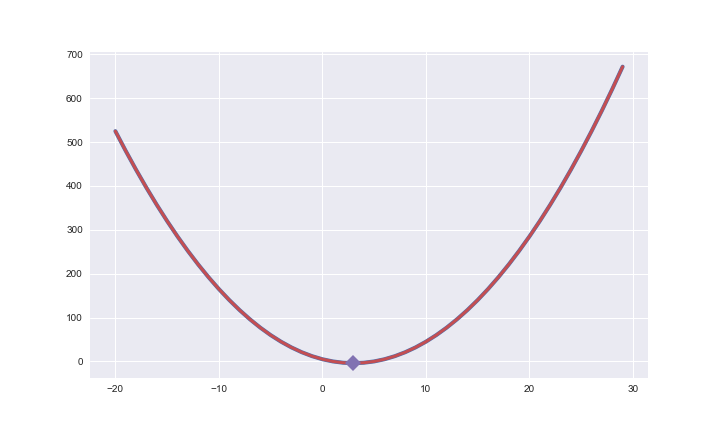
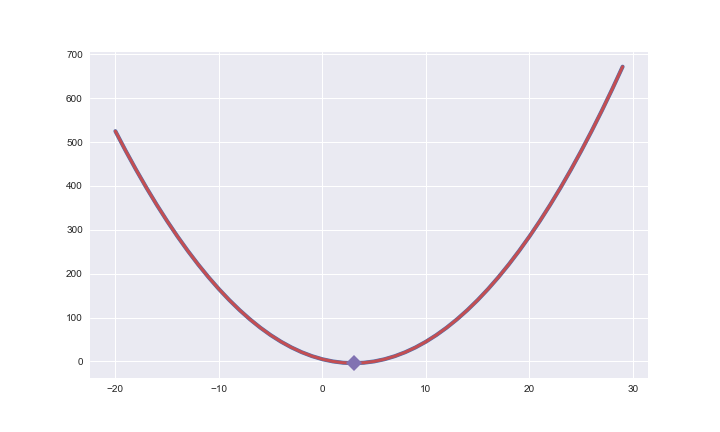
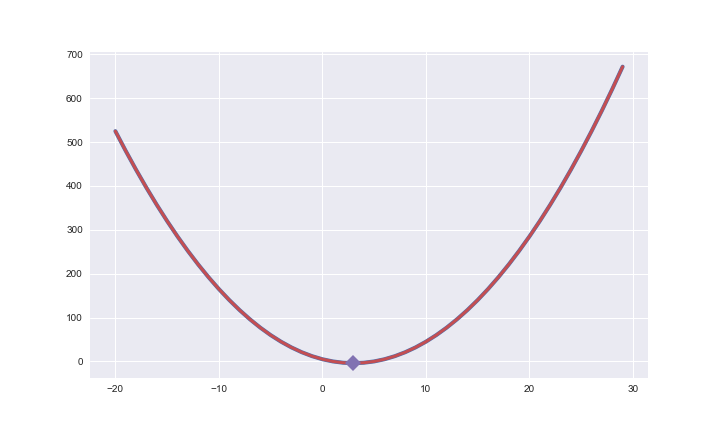
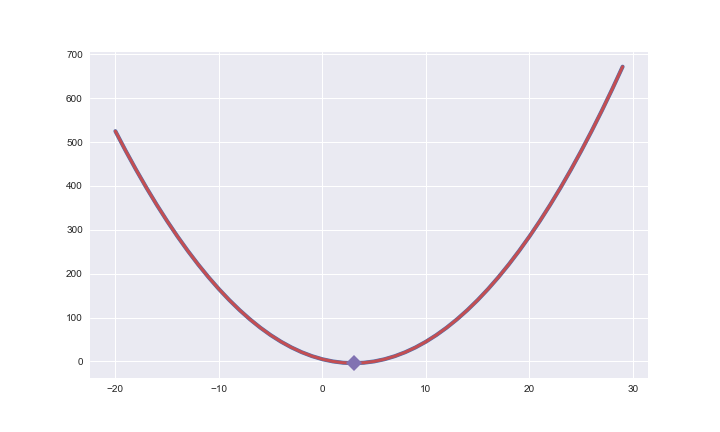
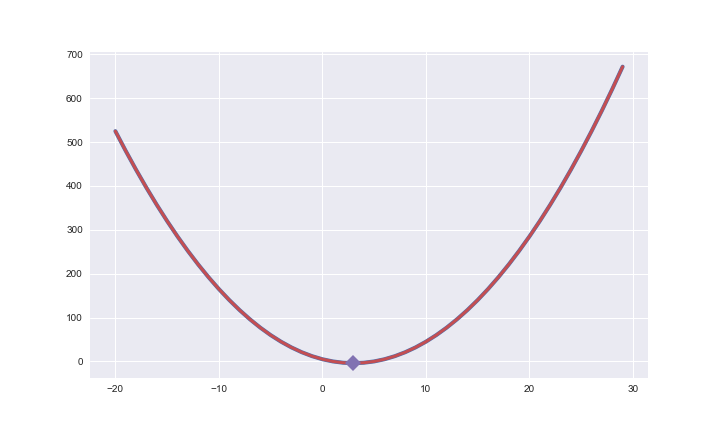
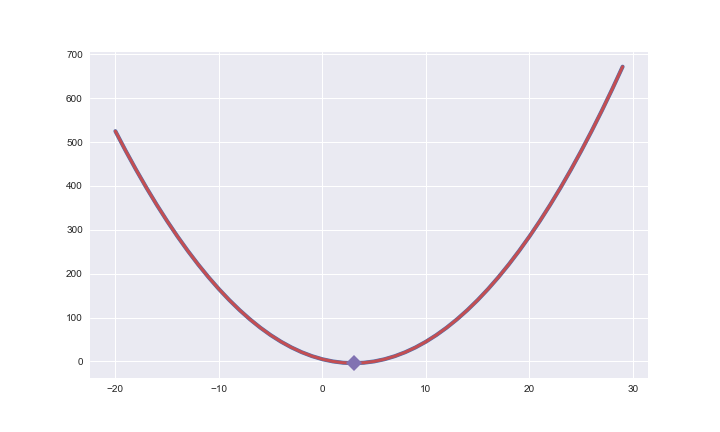
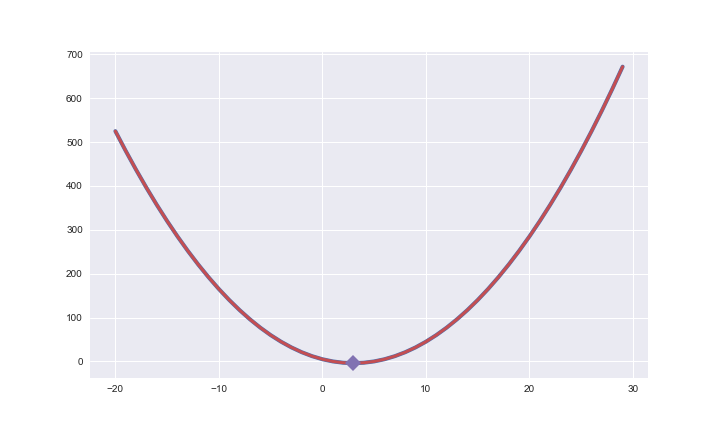
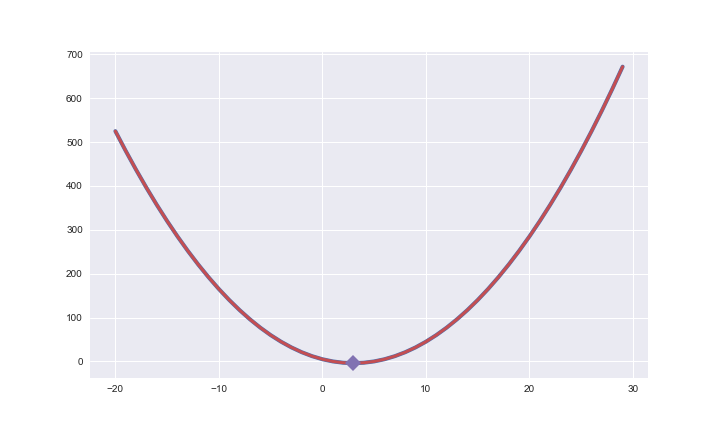
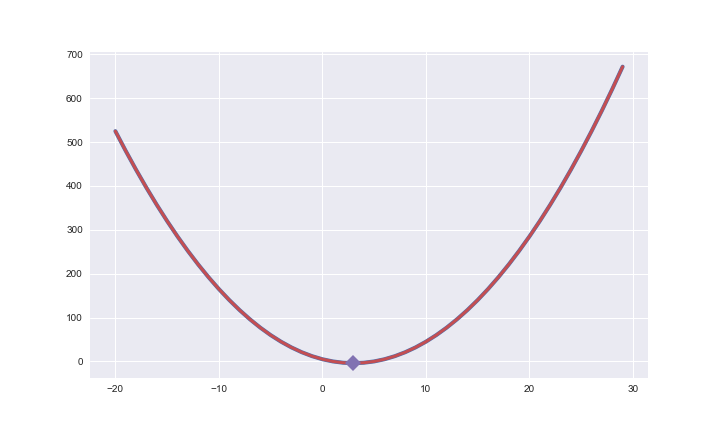
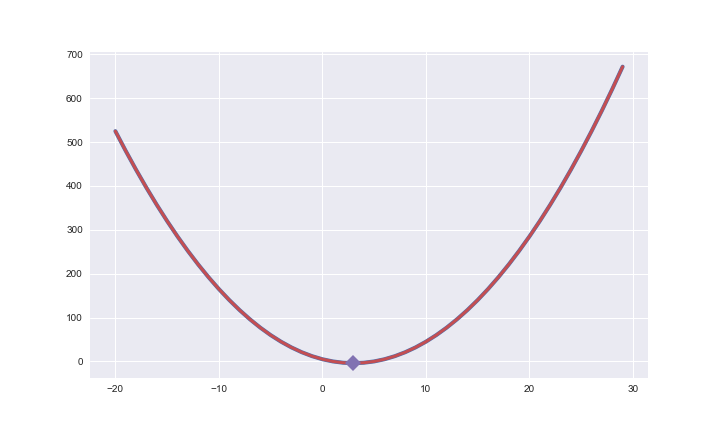
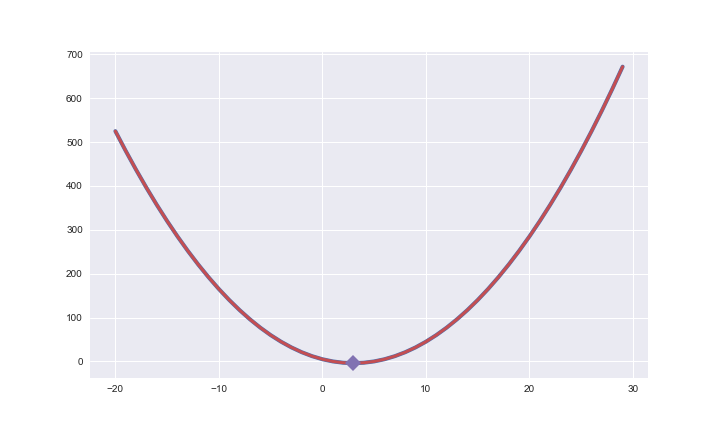
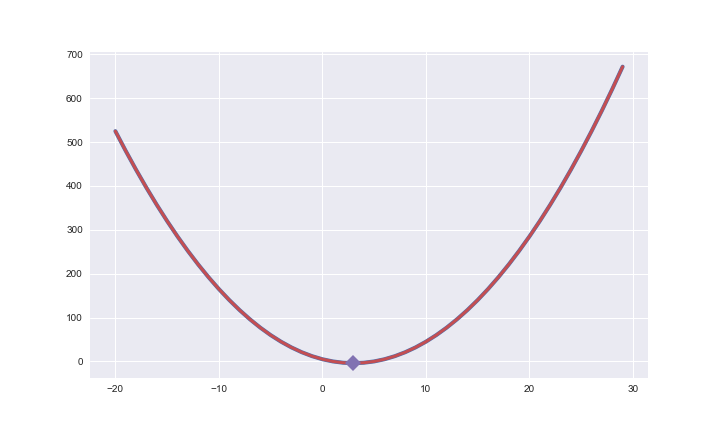

In [9]:
fig = plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.plot(xlist,flist, linewidth=4 )
line, = ax.plot([], [], "D", markersize=12)
fskip2=1
xdatafn = lambda i, fskip: fmins2[0::fskip2][i]
ydatafn = lambda i: f(xdatafn(i, fskip2))
i, a = animator(f, xlist, xdatafn, ydatafn, fskip2, ax, line)
anim = animation.FuncAnimation(fig, a, init_func=i,
                        frames=len(fmins2[0::fskip2]), interval=400)
anim.save('images/1dgd-bigstep.mp4')
anim


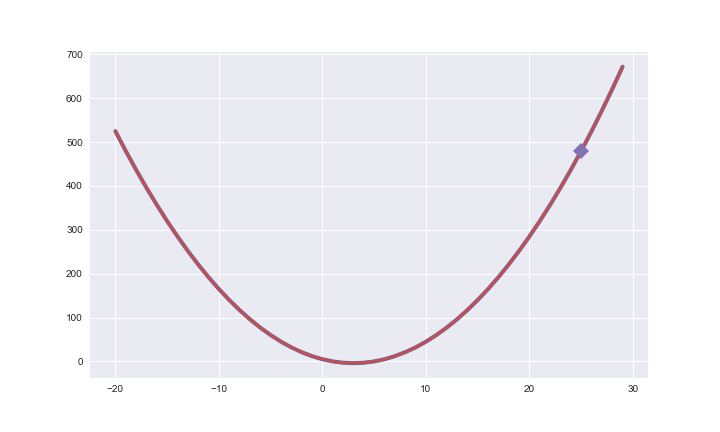
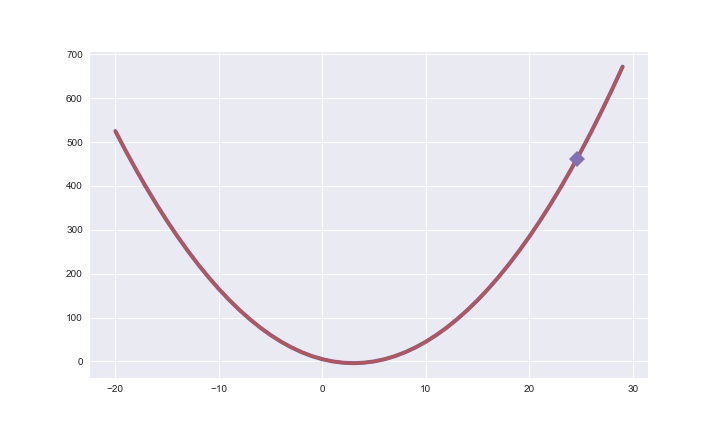
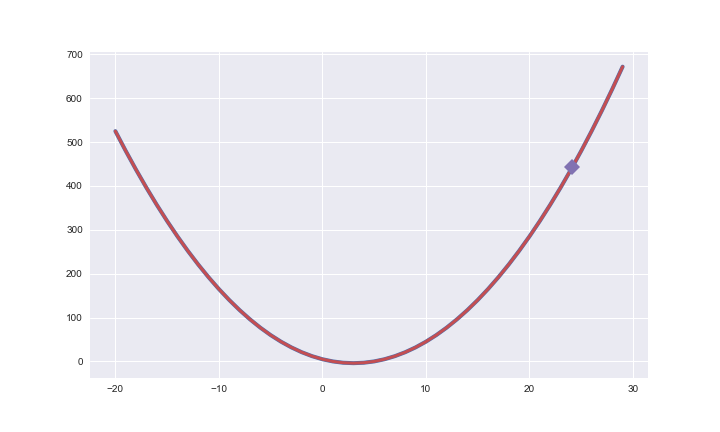
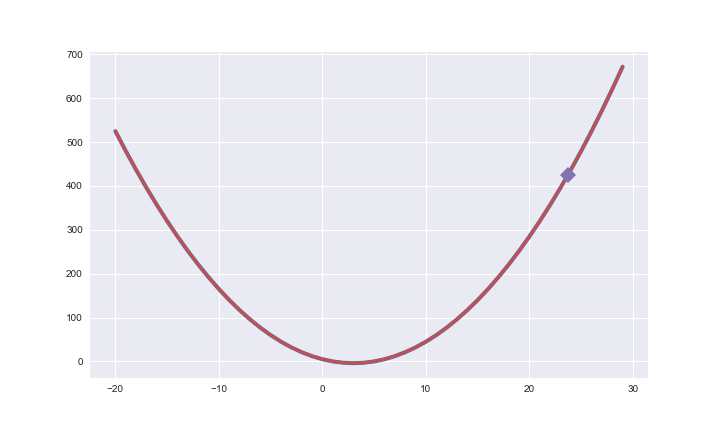
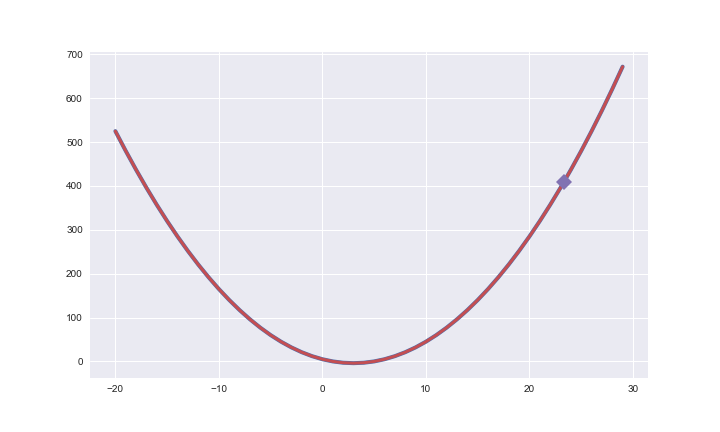
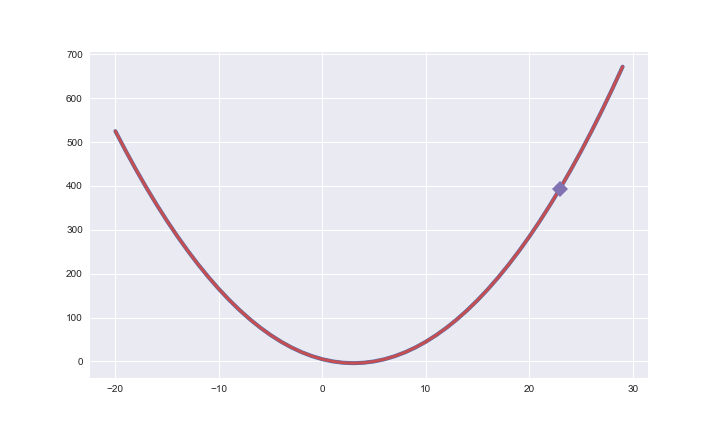
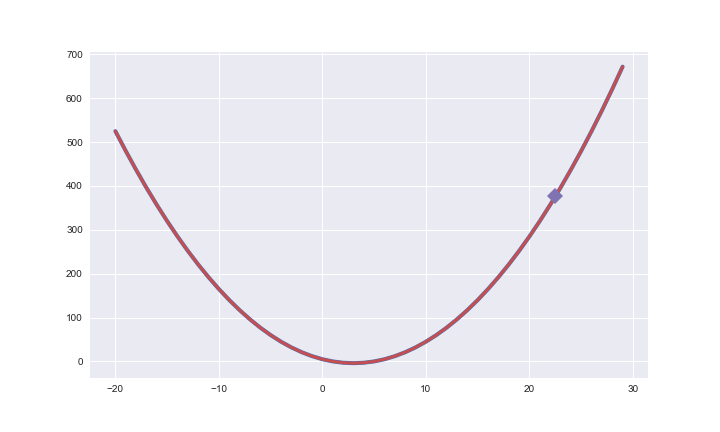
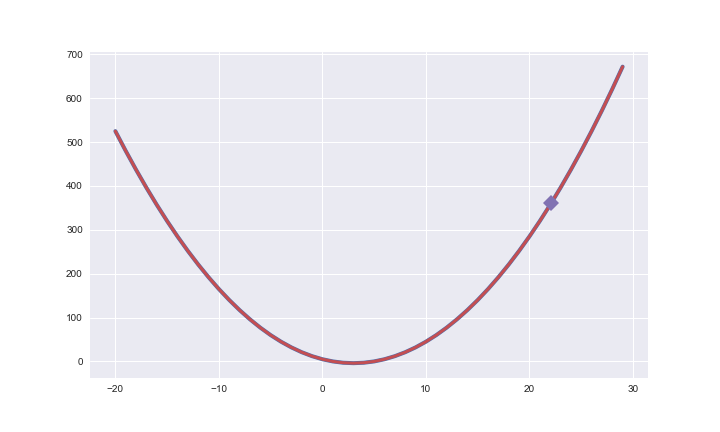
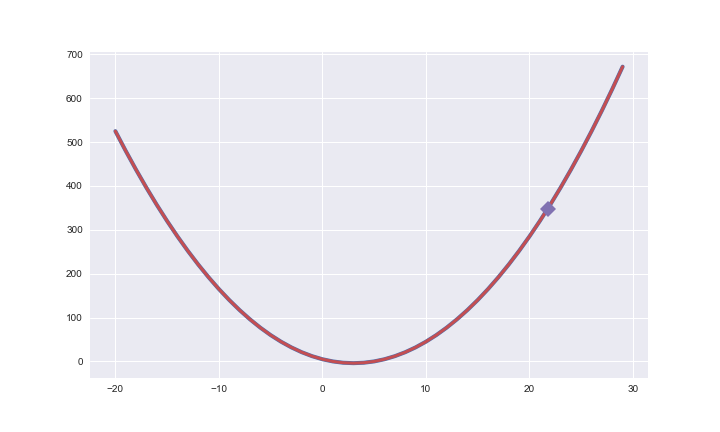
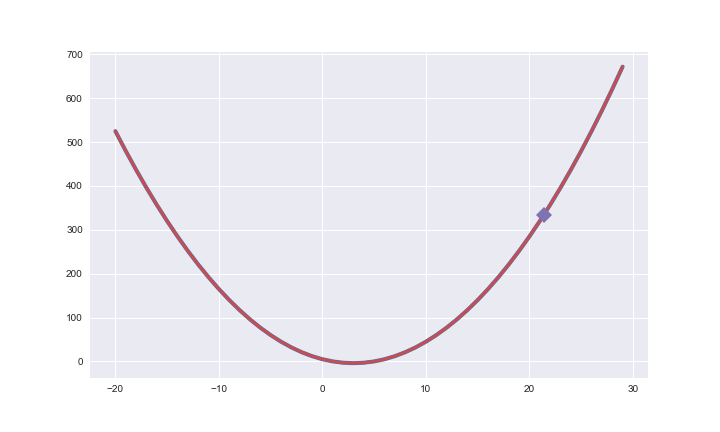
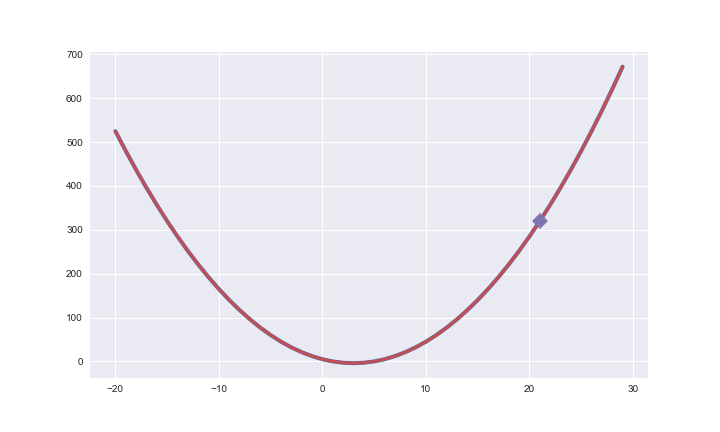

In [10]:
fmins3 = grad_des1d(f, lambda x: 2*x - 6, step=0.001, maxsteps=100)
fig = plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.plot(xlist,flist, linewidth=4 )
line, = ax.plot([], [], "D", markersize=12)
fskip3=10
xdatafn = lambda i, fskip: fmins3[0::fskip3][i]
ydatafn = lambda i: f(xdatafn(i, fskip3))
i, a = animator(f, xlist, xdatafn, ydatafn, fskip3, ax, line)
anim=animation.FuncAnimation(fig, a, init_func=i,
                        frames=len(fmins3[0::fskip3]), interval=200)
anim.save('images/1dgd-smallstep.mp4')
anim